#### Compute a few Fourier transformed window functions

In [148]:
%pylab inline
from scipy.special import spherical_jn
R_max = 400
def flat_window(r):
    if type(r)==float:
        if r<R_max:
            return 1.#r)#R_max
        else:
            return 0.
    else:
        out = np.zeros_like(r)
        out[r<R_max]=1.#1+r[r<R_max])#R_max
        return np.asarray(out)
def cos_window(r):
    if type(r)==float:
        if r<R_max:
            return np.cos(np.pi*r/(2.*R_max))
        else:
            return 0.
    else:
        out = np.zeros_like(r)
        out[r<R_max]=np.cos(np.pi/2.*r[r<R_max]/R_max)
        return np.asarray(out)

from hankel import HankelTransform

Populating the interactive namespace from numpy and matplotlib


In [149]:
def transformed_window(k,window_fun):
    ht=HankelTransform(0.5,h=k/10)
    tmp = ht.transform(lambda r: window_fun(r)*np.sqrt(r),k)[0]*(2.*np.pi)**1.5/np.sqrt(k)
    return tmp

In [150]:
from scipy.integrate import quad
def transformed_zero(window_fun):
    ## k = 0 W-tilde
    out=quad(lambda r: window_fun(r)*r**2.,0,R_max)
    return out[0]

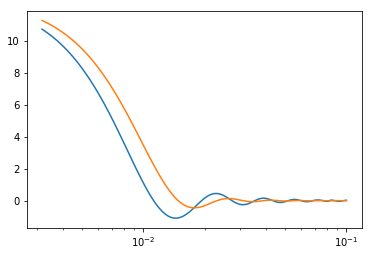

In [151]:
all_k = np.logspace(-2.5,-1,100)
flat_transforms = np.asarray([transformed_window(kk,flat_window) for kk in all_k])
cos_transforms = np.asarray([transformed_window(kk,cos_window) for kk in all_k])
flat_transforms/=transformed_zero(flat_window)
cos_transforms/=transformed_zero(cos_window)
plt.plot(all_k,flat_transforms)
plt.plot(all_k,cos_transforms)
plt.xscale('log');

In [152]:
def top_hat_FT(k,R_max=R_max):
    return 3.*spherical_jn(1,k*R_max)/(k*R_max)

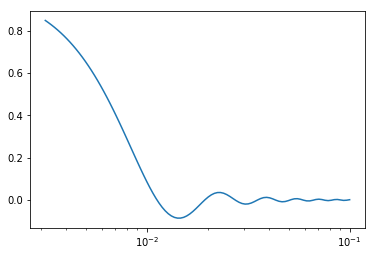

In [154]:
plt.plot(all_k,top_hat_FT(all_k))
plt.xscale('log');